In [1]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv('titanic.csv')

In [13]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [14]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'passenger traveling with')

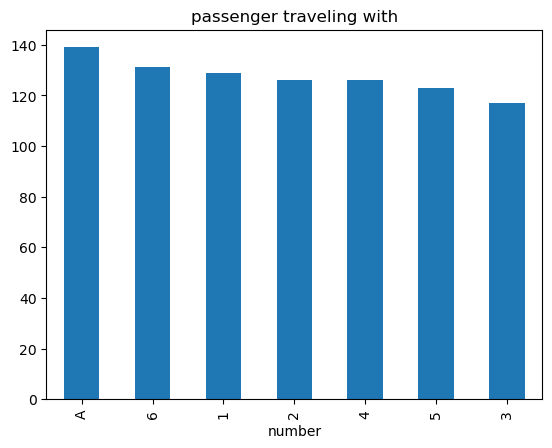

In [16]:
fig=df['number'].value_counts().plot.bar()
fig.set_title('passenger traveling with')

In [20]:
# extract numerical part
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [21]:
# extract categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [23]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [24]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat']=df['Cabin'].str[0] # captures  first letter

In [25]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

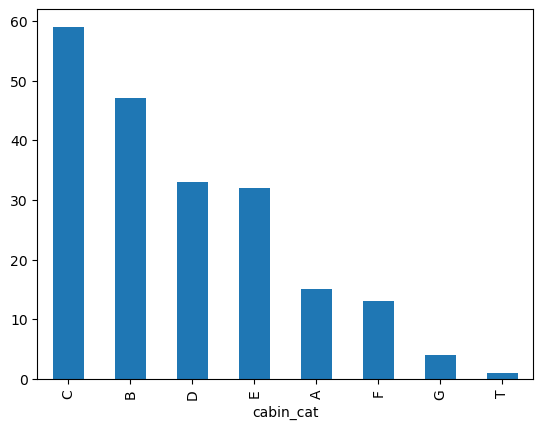

In [26]:
df ['cabin_cat'].value_counts().plot(kind='bar')

In [28]:
df['ticket_num']=df['Ticket'].apply(lambda s: s.split()[-1])# captures numerical part
df['ticket_num']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')# captures numerical part
df['ticket_cat']=df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat']) # captures  first letter

In [29]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,A/5,5.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,PC,3.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,STON/O2.,6.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,113803,3.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,373450,NaN,NaN
